## **Description**
Develop a machine learning program to identify when an article might be fake news. Run by the UTK Machine Learning Club.
The evaluation metric for this competition is accuracy, a very straightforward metric.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>a</mi>
  <mi>c</mi>
  <mi>c</mi>
  <mi>u</mi>
  <mi>r</mi>
  <mi>a</mi>
  <mi>c</mi>
  <mi>y</mi>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>c</mi>
      <mi>o</mi>
      <mi>r</mi>
      <mi>r</mi>
      <mi>e</mi>
      <mi>c</mi>
      <mi>t</mi>
      <mtext>&#xA0;</mtext>
      <mi>p</mi>
      <mi>r</mi>
      <mi>e</mi>
      <mi>d</mi>
      <mi>i</mi>
      <mi>c</mi>
      <mi>t</mi>
      <mi>i</mi>
      <mi>o</mi>
      <mi>n</mi>
      <mi>s</mi>
    </mrow>
    <mrow>
      <mi>c</mi>
      <mi>o</mi>
      <mi>r</mi>
      <mi>r</mi>
      <mi>e</mi>
      <mi>c</mi>
      <mi>t</mi>
      <mtext>&#xA0;</mtext>
      <mi>p</mi>
      <mi>r</mi>
      <mi>e</mi>
      <mi>d</mi>
      <mi>i</mi>
      <mi>c</mi>
      <mi>t</mi>
      <mi>i</mi>
      <mi>o</mi>
      <mi>n</mi>
      <mi>s</mi>
      <mo>+</mo>
      <mi>i</mi>
      <mi>n</mi>
      <mi>c</mi>
      <mi>o</mi>
      <mi>r</mi>
      <mi>r</mi>
      <mi>e</mi>
      <mi>c</mi>
      <mi>t</mi>
      <mtext>&#xA0;</mtext>
      <mi>p</mi>
      <mi>r</mi>
      <mi>e</mi>
      <mi>d</mi>
      <mi>i</mi>
      <mi>c</mi>
      <mi>t</mi>
      <mi>i</mi>
      <mi>o</mi>
      <mi>n</mi>
      <mi>s</mi>
    </mrow>
  </mfrac>
</math>


Accuracy measures false positives and false negeatives equally, and really should only be used in simple cases and when classes are of (generally) equal class size

## **Dataset Description**
**train.csv:** A full training dataset with the following attributes:
- id: unique id for a news article
- title: the title of a news article
- author: author of the news article
- text: the text of the article; could be incomplete
- label: a label that marks the article as potentially unreliable
    - 1: unreliable
    - 0: reliable
    
**test.csv:** A testing training dataset with all the same attributes at train.csv without the label.

### **Getting Data**

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

##### **Explore the missing values**

In [3]:
def explore_data(df):
    '''Input- df= pandas dataframes to be explored
       Output- print shape, info and first 5 records of the dataframe 
    '''
    print("-"*50)
    print('Shape of the dataframe:',df.shape)
    print("Number of records in train data set:",df.shape[0])
    print("Information of the dataset:")
    df.info()
    print("-"*50)
    print("First 5 records of the dataset:")
    return df.head()
    print("-"*50)

In [4]:
explore_data(df_train)

--------------------------------------------------
Shape of the dataframe: (20800, 5)
Number of records in train data set: 20800
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
--------------------------------------------------
First 5 records of the dataset:


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
explore_data(df_test)

--------------------------------------------------
Shape of the dataframe: (5200, 4)
Number of records in train data set: 5200
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB
--------------------------------------------------
First 5 records of the dataset:


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [6]:
#Let's define a function to explore the missing values for the two datasets

def missing_values(df):
    print('{}% of title values are missing from Total Number of Records.'.format(round((df.title.isnull().sum())/(df.shape[0])*100),2))
    print('{}% of author values are missing from Total Number of Records.'.format(round((df.author.isnull().sum())/(df.shape[0])*100),2))
    print('{}% of text values are missing from Total Number of Records.'.format(round((df.text.isnull().sum())/(df.shape[0])*100),2))
       
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

    # Plot histogram of missing values
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    plt.figure(figsize=(10, 6))
    plt.bar(missing_counts.index, missing_counts.values, color='skyblue')
    plt.title('Histogram of Missing Values')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=90)
    plt.show()

2% of title values are missing from Total Number of Records.
10% of author values are missing from Total Number of Records.
0% of text values are missing from Total Number of Records.


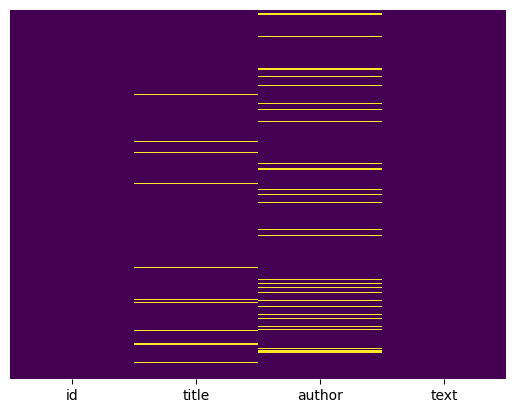

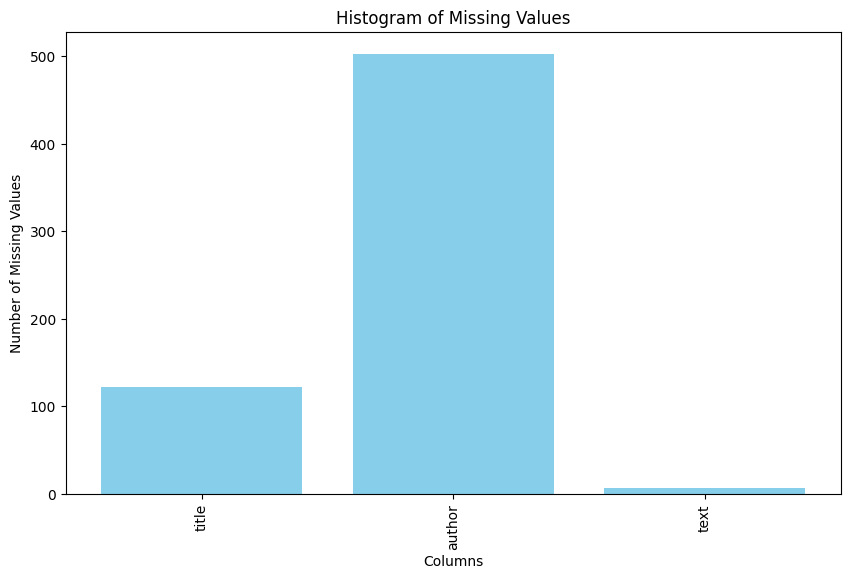

In [7]:
#let's use the missing_values function to see the missing values in the train dataset
missing_values(df_test)

3% of title values are missing from Total Number of Records.
9% of author values are missing from Total Number of Records.
0% of text values are missing from Total Number of Records.


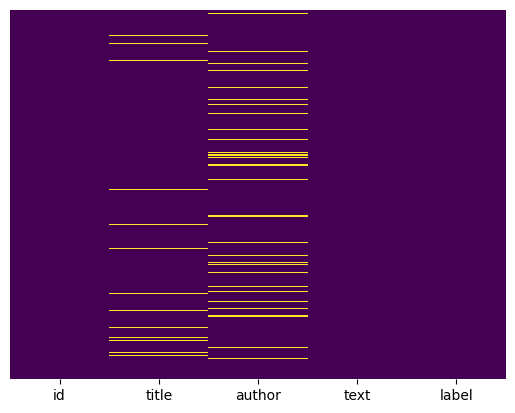

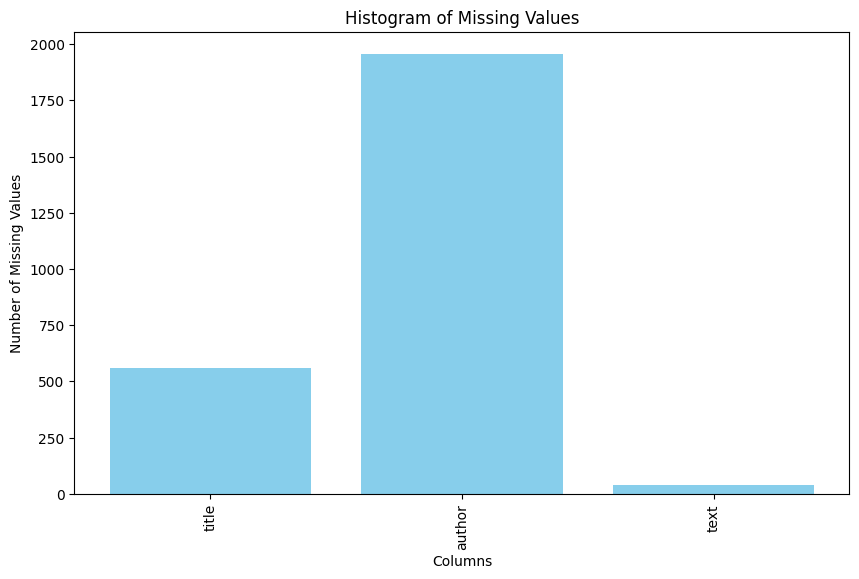

In [8]:
#let's use the missing_values function to see the missing values in the train dataset
missing_values(df_train)

In [9]:
df_test = df_test.dropna()
df_train = df_train.dropna()

As our dataset is very extensive we can afford to drop null instances

In [10]:
df_train.shape, df_test.shape

((18285, 5), (4575, 4))

#### **Class distribution**

Target of 0 is 57 % of total
Target of 1 is 43 % of total


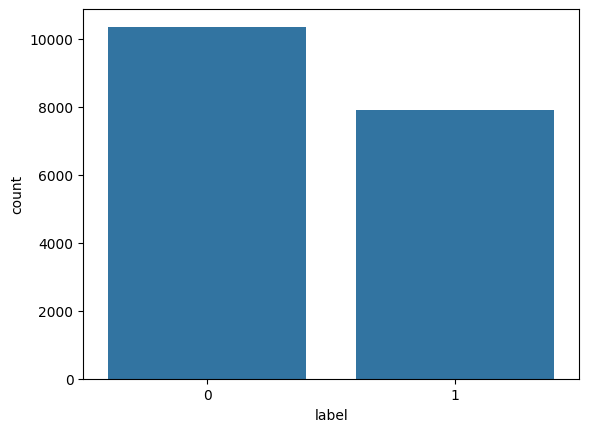

In [11]:
print('Target of 0 is {} % of total'.format(round(df_train['label'].value_counts()[0]/len(df_train['label'])*100)))
print('Target of 1 is {} % of total'.format(round(df_train['label'].value_counts()[1]/len(df_train['label'])*100)))

x=df_train.label.value_counts()
sns.barplot(x=x.index, y=x)
plt.show()

### **Cleaning the Data**
Before starting any NLP project, text data needs to be pre-processed to convert it into in a consistent format.Text will be cleaned, tokneized and converted into a matrix.
- Step 1: Lowercase
- Step 2: Punctuation Removal
- Step 3: HTML Code and URL Links
- Step 4: Spell Checks 
- Step 5: Tokenization
- Step 6: Removing Stop Words
- Step 7: Normalization
    - Stemming
    - Lemmatization

#### **Step 1: Lowercase**

In [12]:
df_train = df_train.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_train

C:\Users\sa\AppData\Local\Temp\ipykernel_10936\3467437343.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train = df_train.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,id,title,author,text,label
0,0,house dem aide: we didn’t even see comey’s let...,darrell lucus,house dem aide: we didn’t even see comey’s let...,1
1,1,"flynn: hillary clinton, big woman on campus - ...",daniel j. flynn,ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,consortiumnews.com,"why the truth might get you fired october 29, ...",1
3,3,15 civilians killed in single us airstrike hav...,jessica purkiss,videos 15 civilians killed in single us airstr...,1
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print \nan iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,rapper t.i.: trump a ’poster child for white s...,jerome hudson,rapper t. i. unloaded on black celebrities who...,0
20796,20796,"n.f.l. playoffs: schedule, matchups and odds -...",benjamin hoffman,when the green bay packers lost to the washing...,0
20797,20797,macy’s is said to receive takeover approach by...,michael j. de la merced and rachel abrams,the macy’s of today grew from the union of sev...,0
20798,20798,"nato, russia to hold parallel exercises in bal...",alex ansary,"nato, russia to hold parallel exercises in bal...",1


In [13]:
df_test = df_train.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_test

C:\Users\sa\AppData\Local\Temp\ipykernel_10936\3176910913.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test = df_train.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,id,title,author,text,label
0,0,house dem aide: we didn’t even see comey’s let...,darrell lucus,house dem aide: we didn’t even see comey’s let...,1
1,1,"flynn: hillary clinton, big woman on campus - ...",daniel j. flynn,ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,consortiumnews.com,"why the truth might get you fired october 29, ...",1
3,3,15 civilians killed in single us airstrike hav...,jessica purkiss,videos 15 civilians killed in single us airstr...,1
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print \nan iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,rapper t.i.: trump a ’poster child for white s...,jerome hudson,rapper t. i. unloaded on black celebrities who...,0
20796,20796,"n.f.l. playoffs: schedule, matchups and odds -...",benjamin hoffman,when the green bay packers lost to the washing...,0
20797,20797,macy’s is said to receive takeover approach by...,michael j. de la merced and rachel abrams,the macy’s of today grew from the union of sev...,0
20798,20798,"nato, russia to hold parallel exercises in bal...",alex ansary,"nato, russia to hold parallel exercises in bal...",1


#### **Step 2: Punctuation**

In [14]:
import string

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation ]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

# Remove punctuation from both train and test dataset
df_train['title_wo_punct']=df_train['title'].apply(lambda x: remove_punctuation(x))
df_test['title_wo_punct']=df_test['title'].apply(lambda x: remove_punctuation(x))

df_train.head()

,id,title,author,text,label,title_wo_punct
0,0,house dem aide: we didn’t even see comey’s let...,darrell lucus,house dem aide: we didn’t even see comey’s let...,1,house dem aide we didn’t even see comey’s lett...
1,1,"flynn: hillary clinton, big woman on campus - ...",daniel j. flynn,ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus bre...
2,2,why the truth might get you fired,consortiumnews.com,"why the truth might get you fired october 29, ...",1,why the truth might get you fired
3,3,15 civilians killed in single us airstrike hav...,jessica purkiss,videos 15 civilians killed in single us airstr...,1,15 civilians killed in single us airstrike hav...
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print \nan iranian woman has been sentenced to...,1,iranian woman jailed for fictional unpublished...


#### **Step 3: HTML Code , URL Links & emoji**

In [15]:
import re  # Import the re module for regular expressions

def text_clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub('<.*?>+', '', text)
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text = regrex_pattern.sub(r'',text)
    text = ''.join([i for i in text if not i.isdigit()])
    return text
df_train['title_wo_punct_clean']=df_train['title_wo_punct'].apply(lambda x: text_clean(x))
df_test['title_wo_punct_clean']=df_test['title_wo_punct'].apply(lambda x: text_clean(x))
df_train.head()

,id,title,author,text,label,title_wo_punct,title_wo_punct_clean
0,0,house dem aide: we didn’t even see comey’s let...,darrell lucus,house dem aide: we didn’t even see comey’s let...,1,house dem aide we didn’t even see comey’s lett...,house dem aide we didn’t even see comey’s lett...
1,1,"flynn: hillary clinton, big woman on campus - ...",daniel j. flynn,ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus bre...,flynn hillary clinton big woman on campus bre...
2,2,why the truth might get you fired,consortiumnews.com,"why the truth might get you fired october 29, ...",1,why the truth might get you fired,why the truth might get you fired
3,3,15 civilians killed in single us airstrike hav...,jessica purkiss,videos 15 civilians killed in single us airstr...,1,15 civilians killed in single us airstrike hav...,civilians killed in single us airstrike have ...
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print \nan iranian woman has been sentenced to...,1,iranian woman jailed for fictional unpublished...,iranian woman jailed for fictional unpublished...


#### **Step 4: Spell Checks**

In [150]:
from textblob import TextBlob

def correct_spelling(text):
    return str(TextBlob(text).correct())

# df_train['text_wo_punct_clean_spell'] = df_train['text_wo_punct_clean'].apply(correct_spelling)
# df_train['title_wo_punct_clean_spell'] = df_train['title_wo_punct_clean'].apply(correct_spelling)
# df_test['text_wo_punct_clean_spell'] = df_test['text_wo_punct_clean'].apply(correct_spelling)
# df_test['title_wo_punct_clean_spell'] = df_test['title_wo_punct_clean'].apply(correct_spelling)

#### **Step 4: Tokenization**
Tokenizing is the process of splitting strings into a list of words. We will make use of Regular Expressions or regex to do the splitting. Regex can be used to describe a search pattern.

In [16]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split

df_train['title_wo_punct_clean_spell_split']=df_train['title_wo_punct_clean'].apply(lambda x: tokenize(x.lower()))
df_test['title_wo_punct_clean_spell_split']=df_test['title_wo_punct_clean'].apply(lambda x: tokenize(x.lower()))
df_test['title_wo_punct_clean_spell_split']

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\sa\AppData\Local\Temp\ipykernel_10936\2286958798.py:2: SyntaxWarning: invalid escape sequence '\W'
  split=re.split("\W+",text)


0        [house, dem, aide, we, didn, t, even, see, com...
1        [flynn, hillary, clinton, big, woman, on, camp...
2                [why, the, truth, might, get, you, fired]
3        [, civilians, killed, in, single, us, airstrik...
4        [iranian, woman, jailed, for, fictional, unpub...
                               ...                        
20795    [rapper, ti, trump, a, poster, child, for, whi...
20796    [nfl, playoffs, schedule, matchups, and, odds,...
20797    [macy, s, is, said, to, receive, takeover, app...
20798    [nato, russia, to, hold, parallel, exercises, ...
20799                         [what, keeps, the, f, alive]
Name: title_wo_punct_clean_spell_split, Length: 18285, dtype: object

#### **Step 5: Stop words**
Stop words are irrelevant words that won’t help in identifying a text as real or fake. We will use “nltk” library for stop-words and some of the stop words

In [17]:
import nltk
from nltk.corpus import stopwords

stopword = nltk.corpus.stopwords.words('english')
print('Stopwords are:',stopword)

Stopwords are: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 

In [18]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text

df_train['title_wo_punct_clean_spell_split_stopwords']=df_train['title_wo_punct_clean_spell_split'].apply(lambda x: remove_stopwords(x))
df_test['title_wo_punct_clean_spell_split_stopwords']=df_test['title_wo_punct_clean_spell_split'].apply(lambda x: remove_stopwords(x))
df_train.head()

,id,title,author,text,label,title_wo_punct,title_wo_punct_clean,title_wo_punct_clean_spell_split,title_wo_punct_clean_spell_split_stopwords
0,0,house dem aide: we didn’t even see comey’s let...,darrell lucus,house dem aide: we didn’t even see comey’s let...,1,house dem aide we didn’t even see comey’s lett...,house dem aide we didn’t even see comey’s lett...,"[house, dem, aide, we, didn, t, even, see, com...","[house, dem, aide, even, see, comey, letter, j..."
1,1,"flynn: hillary clinton, big woman on campus - ...",daniel j. flynn,ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus bre...,flynn hillary clinton big woman on campus bre...,"[flynn, hillary, clinton, big, woman, on, camp...","[flynn, hillary, clinton, big, woman, campus, ..."
2,2,why the truth might get you fired,consortiumnews.com,"why the truth might get you fired october 29, ...",1,why the truth might get you fired,why the truth might get you fired,"[why, the, truth, might, get, you, fired]","[truth, might, get, fired]"
3,3,15 civilians killed in single us airstrike hav...,jessica purkiss,videos 15 civilians killed in single us airstr...,1,15 civilians killed in single us airstrike hav...,civilians killed in single us airstrike have ...,"[, civilians, killed, in, single, us, airstrik...","[, civilians, killed, single, us, airstrike, i..."
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print \nan iranian woman has been sentenced to...,1,iranian woman jailed for fictional unpublished...,iranian woman jailed for fictional unpublished...,"[iranian, woman, jailed, for, fictional, unpub...","[iranian, woman, jailed, fictional, unpublishe..."


#### **Step 6: Normalization**
Normalization brings all the words under on the roof by adding stemming and lemmatization

**Stemming**
There are many variations of words that do not bring any new information and create redundancy. Take *"He likes to walk"* and *"He likes walking,"* for example. Both have the same meaning, so the stemming function will remove the suffix and convert *"walking" to "walk."* The example in this guide uses the PorterStemmer module to conduct the process. You can use the snowball module for different languages.

In [19]:
from nltk.stem.porter import PorterStemmer 
# Stemming: Taking the root of the word
def stemming_text(word_list):
    porter_stemmer = PorterStemmer()
    stem_output = ' '.join([PorterStemmer().stem(word) for word in word_list])
    return stem_output
df_train['title_wo_punct_clean_spell_split_stopwords_stemp']=df_train['title_wo_punct_clean_spell_split_stopwords'].apply(lambda x: remove_stopwords(x))
df_test ['title_wo_punct_clean_spell_split_stopwords_stemp']=df_test['title_wo_punct_clean_spell_split_stopwords'].apply(lambda x: remove_stopwords(x))
df_train.head()

,id,title,author,text,label,title_wo_punct,title_wo_punct_clean,title_wo_punct_clean_spell_split,title_wo_punct_clean_spell_split_stopwords,title_wo_punct_clean_spell_split_stopwords_stemp
0,0,house dem aide: we didn’t even see comey’s let...,darrell lucus,house dem aide: we didn’t even see comey’s let...,1,house dem aide we didn’t even see comey’s lett...,house dem aide we didn’t even see comey’s lett...,"[house, dem, aide, we, didn, t, even, see, com...","[house, dem, aide, even, see, comey, letter, j...","[house, dem, aide, even, see, comey, letter, j..."
1,1,"flynn: hillary clinton, big woman on campus - ...",daniel j. flynn,ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus bre...,flynn hillary clinton big woman on campus bre...,"[flynn, hillary, clinton, big, woman, on, camp...","[flynn, hillary, clinton, big, woman, campus, ...","[flynn, hillary, clinton, big, woman, campus, ..."
2,2,why the truth might get you fired,consortiumnews.com,"why the truth might get you fired october 29, ...",1,why the truth might get you fired,why the truth might get you fired,"[why, the, truth, might, get, you, fired]","[truth, might, get, fired]","[truth, might, get, fired]"
3,3,15 civilians killed in single us airstrike hav...,jessica purkiss,videos 15 civilians killed in single us airstr...,1,15 civilians killed in single us airstrike hav...,civilians killed in single us airstrike have ...,"[, civilians, killed, in, single, us, airstrik...","[, civilians, killed, single, us, airstrike, i...","[, civilians, killed, single, us, airstrike, i..."
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print \nan iranian woman has been sentenced to...,1,iranian woman jailed for fictional unpublished...,iranian woman jailed for fictional unpublished...,"[iranian, woman, jailed, for, fictional, unpub...","[iranian, woman, jailed, fictional, unpublishe...","[iranian, woman, jailed, fictional, unpublishe..."


**Lemmatization**

Unlike stemming, *lemmatization* performs normalization using vocabulary and morphological analysis of words. *Lemmatization* aims to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. *Lemmatization* uses a dictionary, which makes it slower than stemming, however the results make much more sense than what you get from stemming. *Lemmatization* is built on WordNet's built-in morphy function, making it an intelligent operation for text analysis. A WordNet module is a large and public lexical database for the English language. Its aim is to maintain the structured relationship between the words. The *WordNetLemmitizer()* is the earliest and most widely used function.

In [32]:
from nltk.stem import WordNetLemmatizer
def lemmatize_text(word_list):
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

df_train['clean_title']=df_train['title_wo_punct_clean_spell_split_stopwords_stemp'].apply(lambda x: lemmatize_text(x))
df_test['clean_title']=df_test['title_wo_punct_clean_spell_split_stopwords_stemp'].apply(lambda x: lemmatize_text(x))
df_test.head()

,id,title,author,text,label,title_wo_punct,title_wo_punct_clean,title_wo_punct_clean_spell_split,title_wo_punct_clean_spell_split_stopwords,title_wo_punct_clean_spell_split_stopwords_stemp,clean_title
0,0,house dem aide: we didn’t even see comey’s let...,darrell lucus,house dem aide: we didn’t even see comey’s let...,1,house dem aide we didn’t even see comey’s lett...,house dem aide we didn’t even see comey’s lett...,"[house, dem, aide, we, didn, t, even, see, com...","[house, dem, aide, even, see, comey, letter, j...","[house, dem, aide, even, see, comey, letter, j...",house dem aide even see comey letter jason cha...
1,1,"flynn: hillary clinton, big woman on campus - ...",daniel j. flynn,ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus bre...,flynn hillary clinton big woman on campus bre...,"[flynn, hillary, clinton, big, woman, on, camp...","[flynn, hillary, clinton, big, woman, campus, ...","[flynn, hillary, clinton, big, woman, campus, ...",flynn hillary clinton big woman campus breitbart
2,2,why the truth might get you fired,consortiumnews.com,"why the truth might get you fired october 29, ...",1,why the truth might get you fired,why the truth might get you fired,"[why, the, truth, might, get, you, fired]","[truth, might, get, fired]","[truth, might, get, fired]",truth might get fired
3,3,15 civilians killed in single us airstrike hav...,jessica purkiss,videos 15 civilians killed in single us airstr...,1,15 civilians killed in single us airstrike hav...,civilians killed in single us airstrike have ...,"[, civilians, killed, in, single, us, airstrik...","[, civilians, killed, single, us, airstrike, i...","[, civilians, killed, single, us, airstrike, i...",civilian killed single u airstrike identified
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print \nan iranian woman has been sentenced to...,1,iranian woman jailed for fictional unpublished...,iranian woman jailed for fictional unpublished...,"[iranian, woman, jailed, for, fictional, unpub...","[iranian, woman, jailed, fictional, unpublishe...","[iranian, woman, jailed, fictional, unpublishe...",iranian woman jailed fictional unpublished sto...


### **Embeddings**
Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers
To convert string data into numerical data one can use following methods
- Bag of words
- TFIDF
- Word2Vec

#### **Bag of Words**
The bag of words is a representation of text that describes the occurrence of words within a document. It involves two things:
- A vocabulary of known words.
- A measure of the presence of known words.
Why is it is called a “bag” of words?

Its called bag of words because any information about the order or structure of words in the document is discarded and the model is only concerned with whether the known words occur in the document, not where they occur in the document.

**Bag of Words - Countvectorizer Features:** Countvectorizer converts a collection of text documents to a matrix of token counts. It is important to note that CountVectorizer comes with a lot of options to automatically do preprocessing, tokenization, and stop word removal. However, all the pre-processing of the text has already been performed by creating a function.Only vanilla version of Countvectorizer will be used.


In [33]:
corpus_train = df_train['clean_title']
corpus_test = df_test['clean_title']
corpus_train[1]

'flynn hillary clinton big woman campus breitbart'

In [34]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 10000  
onehot_repr_test=[one_hot(words,vocab_size)for words in corpus_test] 
onehot_repr_train=[one_hot(words,vocab_size)for words in corpus_train]
onehot_repr_train[1]

[5518, 3456, 5776, 3129, 8470, 4476, 7109]

In [41]:
from sklearn.model_selection import train_test_split

#Split the CountVector vectorized data into train and test datasets for model training and testing
X_train, X_test, y_train, y_test =train_test_split(onehot_repr_train,df_train.label,test_size=0.2,random_state=2020)


#### **Padding**

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Determine the maximum length of sequences (you can set it to any value based on your data)
max_length = max(len(seq) for seq in onehot_repr_train)

# Pad sequences to ensure all sequences have the same length
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

# Convert to numpy arrays
X_train = np.array(X_train_padded)
X_test = np.array(X_test_padded)

# Now you can access the shape attribute
print('Shape of train:', X_train.shape)
print("Shape of validation:", X_test.shape)

Shape of train: (14628, 46)
Shape of validation: (3657, 46)


### **Creating Model**

In [44]:
import numpy as np
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the model
model = Sequential()
# Add Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedded_vector_features, input_length=max_length))
# Add Dropout layer
model.add(Dropout(0.3))
# Add LSTM layer
model.add(LSTM(100))
# Add Dropout layer
model.add(Dropout(0.3))
# Add Dense layer
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\sa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### **Model Prediction**

In [45]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6619 - loss: 0.5731 - val_accuracy: 0.9117 - val_loss: 0.2153
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9354 - loss: 0.1757 - val_accuracy: 0.9240 - val_loss: 0.2164
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9634 - loss: 0.1135 - val_accuracy: 0.9297 - val_loss: 0.1926
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9784 - loss: 0.0736 - val_accuracy: 0.9264 - val_loss: 0.2092
Epoch 5/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9843 - loss: 0.0595 - val_accuracy: 0.9240 - val_loss: 0.2399
Epoch 6/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9841 - loss: 0.0555 - val_accuracy: 0.9207 - val_loss: 0.2569
Epoch 7/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9868 - loss: 0.0514 - val_accuracy: 0.9185 - val_loss: 0.3229
Epoch 8/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9891 - loss: 0.0381 - val_acc

### **Performance Metrics**

In [46]:
y_pred = model.predict(X_test)

115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [47]:
# AUC ROC Curve
y_pred = np.where(y_pred>0.5, 1, 0)
y_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1966,  136],
       [ 173, 1382]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9155045118949959

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2102
           1       0.91      0.89      0.90      1555

    accuracy                           0.92      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.92      0.92      0.92      3657

